# 단순 선형 회귀 (학습 성능 개선)
- 텐서플로우의 학습성능을 개선하기 위해 아래의 기능을 사용할 수 있음
1. `데이터 표준화`: 학습률 향상에 도움을 줌
2. `콜백 함수`: 모델의 학습 방향, 저장 시점, 학습 정지 시점 등에 관한 상황을 모니터링하기 위한 도구

## 1. 데이터 정규화 (Normalization)
### 1) 데이터 정규화의 이해
- 데이터 정규화란? 
    - 모든 데이터가 동일한 정도의 스케일(중요도)로 반영되도록 해주는 처리
- 정규화를 해야하는 이유
    - 머신러닝 알고리즘은 데이터가 가진 feature(특성)들을 비교하여 데이터의 패턴을 찾는다
    - 이 때, 데이터가 가진 feature의 스케일이 심하게 차이가 나는 경우 수많은 학습단계를 거쳐 최적값에 도달하게 된다
    - 데이터에 `정규화 처리를 적용`하면 `쉽게 최적값에 도달`할 수 있으며 `학습률을 상대적으로 높여서 사용`할 수 있기 때문에 빠르게 훈련시킬 수 있다.

### 2) 데이터 정규화 방법
#### 1- 최소-최대 정규화 (Min-Max Normalization)
- 모든 feature에 대해 각각의 `최솟값 0`, `최대값 1`로, 그리고 `다른 값들은 0과 1 사이의 값`으로 변환
- 예) 어떤 특성의 `최솟값이 20`이고 `최대값이 40`인 경우, 30이라는 데이터가 있을 경우, 20은 `0`, 40은 `1`로 환산되기 때문에 30은 중간치인 `0.5`로 변환됨

## 2. 콜백함수
- 모델의 학습 방향, 저장 시점, 학습 정지 시점 등에 관한 상황을 모니터링하기 위한 도구
### 1) 콜백함수 사용 방법
- 콜백 정의

    ```python
    callbacks = [  콜백1, 콜백2, ... 콜백n  ]
    ```
- 학습을 위한 `fit() 함수`에서 `callbacks 파라미터`에 미리 정의한 리스트를 지정

    ```python
    callbacks = [콜백1, 콜백2, ..., 콜백n]
    model.fit(x_train, 
              y_train, 
              validation_data = (x_val, y_val), 
              epochs = 500, 
              callbacks=callbacks)```
- 혹은

    ```python
    model.fit(x_train,
              y_train,
              validation_data = (x_val, y_val),
              epochs = 500,
              callbacks = [콜백1, 콜백2, ..., 콜백n])```

### 2) 콜백함수 종류
#### 1- EarlyStopping()
- 모델 학습 시에 지정된 기간 동안 모니터링하는 평가지표에서 더 이상 성능 향상이 일어나지 않는 경우 학습을 스스로 중단

    ```python
    EarlyStopping(monitor='평가지표', patience=10, verbose=1)```

- patience: 지정한 수만큼의 기간에서 평가지표의 향상이 일어나지 않을 경우 학습을 중단 (기간=에폭)
    - 예) `patience=10`일 때, 10에폭 동안 성능 향상이 일어나지 않으면 학습을 중단. 즉, `10회 이상 성능향상이 발견되지 않으면 중단`
- verbose: 콜백의 수행 과정 노출 여부를 지정
    - 0: 아무런 표시 하지 않음(기본값)
    - 1: 프로그래스바로 표시
    - 2: 매 에폭마다 수행과정을 자세하게 출력함
#### 2- ReduceLROnPlateau()
- EarlyStopping 콜백과 같이 patience 인자를 지정하여, 지정된 기간 동안 평가지표에서 성능 향상이 일어나지 않으면 학습률을 조정하는 콜백

    ```python
    ReduceLROnPlateau(monitor='평가지표', factor=0.1,
                      patience=10, min_lr=0, verbose=1)```

- factor: 학습률 조정에 사용되는 값 (새로운 학습률 = factor  * 기존 학습률)
- patience: 지정한 수만큼의 기간에서 성능 향상이 일어나지 않을 경우, 학습률을 조정
- min_lr: 학습률의 하한 (lower limit)을 지정
- verbose: 콜백의 수행 과정 노출 여부를 지정
#### 3- ModelCheckpoint()
- 지정한 평가지표를 기준으로 `가장 뛰어난 성능을 보여주는 모델을 저장` 할 때 사용

    ```python
    ModelCheckpoint(filepath, monitor='평가지표', verbose=1,
                    save_best_only = True|False, save_weights_only = False)```
- filepath: 모델의 저장 경로를 지정
- save_best_only: True인 경우, 가장 성능이 뛰어난 모델만 저장. 그보다 좋지 않은 모델의 경우는 덮어쓰지 않음
- save_weights_only: 모델의 가중치만 저장
## 3. 단순선형회귀 수행
### 1) 패키지 준비하기

In [19]:
import sys, os
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

# 데이터를 훈련용과 테스트용으로 나누는 기능
from sklearn.model_selection import train_test_split
# 데이터 정규화를 위한 패키지
from sklearn.preprocessing import MinMaxScaler

# 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.models import Sequential
# 모델 객체에 학습층을 쌓기 위한 클래스
from tensorflow.keras.layers import Dense
# 학습에 대한 콜백함수 참조
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

### 2) 데이터셋 준비

In [2]:
origin = read_excel('https://data.hossam.kr/E04/cars.xlsx')
origin.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


### 3) 데이터 전처리
- 결측치 확인

In [3]:
origin.isna().sum()

speed    0
dist     0
dtype: int64

> 결측치 없음

### 4) 탐색적 데이터 분석
- 기본통계 확인

In [4]:
origin.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


- 산점도 그래프와 추세선 확인
    - `seaborn.regplot()`

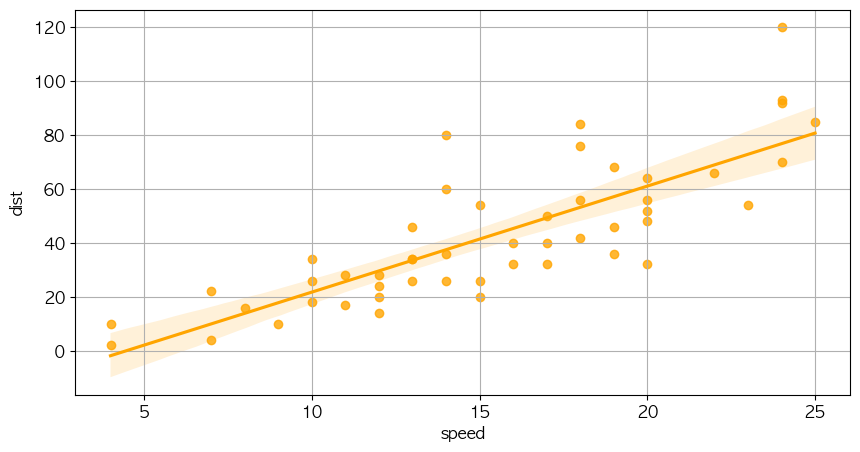

In [5]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
sb.regplot(data=origin, x='speed', y='dist', color='orange')
plt.grid()

plt.show()
plt.close()

> 곡선보다는 선형 분포에 더 가까우므로 단순선형회귀모델을 적용하기로 함

### 5) 데이터셋 분할
- 랜덤시드 고정

In [6]:
np.random.seed(777)

- 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

In [7]:
x = origin.drop(['dist'], axis = 1)
y = origin[['dist']]
print('훈련데이터 크기:', x.shape, '/ 레이블 크기:', y.shape)

훈련데이터 크기: (50, 1) / 레이블 크기: (50, 1)


- (추가) 데이터 정규화(표준화) 수행

In [8]:
# 독립변수 표준화
x_scaler = MinMaxScaler()
x_scale = x_scaler.fit_transform(x)
x_scale

# 종속변수 표준화
y_scaler = MinMaxScaler()
y_scale = y_scaler.fit_transform(y)
y_scale

array([[0.        ],
       [0.06779661],
       [0.01694915],
       [0.16949153],
       [0.11864407],
       [0.06779661],
       [0.13559322],
       [0.20338983],
       [0.27118644],
       [0.12711864],
       [0.22033898],
       [0.10169492],
       [0.15254237],
       [0.18644068],
       [0.22033898],
       [0.20338983],
       [0.27118644],
       [0.27118644],
       [0.37288136],
       [0.20338983],
       [0.28813559],
       [0.49152542],
       [0.66101695],
       [0.15254237],
       [0.20338983],
       [0.44067797],
       [0.25423729],
       [0.3220339 ],
       [0.25423729],
       [0.3220339 ],
       [0.40677966],
       [0.33898305],
       [0.45762712],
       [0.62711864],
       [0.69491525],
       [0.28813559],
       [0.37288136],
       [0.55932203],
       [0.25423729],
       [0.38983051],
       [0.42372881],
       [0.45762712],
       [0.52542373],
       [0.54237288],
       [0.44067797],
       [0.57627119],
       [0.76271186],
       [0.771

- 훈련 데이터와 검증 데이터로 분할

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, 
                                                    y_scale, 
                                                    test_size = 0.3, 
                                                    random_state=777)
print('훈련용 데이터셋 크기: %d, 검증용 데이터셋 크기: %d' % (len(x_train), len(x_test)))

훈련용 데이터셋 크기: 35, 검증용 데이터셋 크기: 15


### 6) 모델 개발
- 모델 정의

In [10]:
my_model = Sequential()
# 1차원의 데이터를 입력으로 받고, 32개의 출력을 가지는 첫 번때 Dense 층
my_model.add(Dense(32, activation = 'relu', input_shape = (1,)))
# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# -> linear는 기본값이므로 생략 가능
my_model.add(Dense(1, activation = 'linear'))

my_model.compile(optimizer='adam', 
                 loss='mse',
                 metrics=['mae'])
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
os.getcwd()

'/Users/dayoonz/Desktop/data_analysist/F_데이터마이닝/3_Tensorflow'

In [13]:
# result = my_model.fit(x_train, y_train, epochs=500, validation_data=(x_test,y_test))
# 파일이 저장될 경로(폴더) 지정 (한글, 공백, 점(.)이 포함되어 잇을 경우 에러 발생함)

checkpoint_path = os.path.join('D:\\tensorflow_checkpoint\\model07-cp-{epoch:04d}-ckpt')

result = my_model.fit(x_train, 
                      y_train, 
                      epochs=500, 
                      validation_data=(x_test,y_test),
                      callbacks=[EarlyStopping(monitor='val_loss',
                                               patience=10,
                                               verbose=1),
                                ReduceLROnPlateau(monitor='val_loss',
                                                  patience=3,
                                                  factor = 0.5,
                                                  min_lr=0.0001,
                                                  verbose=1),
                                ModelCheckpoint(filepath=checkpoint_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)])
# 학습 결과
result_df = DataFrame(result.history)
result_df['epochs']=result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4347 - mae: 0.5832
Epoch 1: val_loss improved from inf to 0.26868, saving model to D:\tensorflow_checkpoint\model07-cp-0001-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0001-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0001-ckpt/assets


2/2 [==============================] - 1s 351ms/step - loss: 0.4071 - mae: 0.5602 - val_loss: 0.2687 - val_mae: 0.4599 - lr: 0.0010
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3694 - mae: 0.5296
Epoch 2: val_loss improved from 0.26868 to 0.25158, saving model to D:\tensorflow_checkpoint\model07-cp-0002-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0002-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0002-ckpt/assets


2/2 [==============================] - 0s 182ms/step - loss: 0.3837 - mae: 0.5416 - val_loss: 0.2516 - val_mae: 0.4435 - lr: 0.0010
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3497 - mae: 0.5132
Epoch 3: val_loss improved from 0.25158 to 0.23514, saving model to D:\tensorflow_checkpoint\model07-cp-0003-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0003-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0003-ckpt/assets


2/2 [==============================] - 0s 178ms/step - loss: 0.3618 - mae: 0.5230 - val_loss: 0.2351 - val_mae: 0.4271 - lr: 0.0010
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3360 - mae: 0.5051
Epoch 4: val_loss improved from 0.23514 to 0.21933, saving model to D:\tensorflow_checkpoint\model07-cp-0004-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0004-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0004-ckpt/assets


2/2 [==============================] - 0s 184ms/step - loss: 0.3408 - mae: 0.5046 - val_loss: 0.2193 - val_mae: 0.4107 - lr: 0.0010
Epoch 5/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3135 - mae: 0.4824
Epoch 5: val_loss improved from 0.21933 to 0.20418, saving model to D:\tensorflow_checkpoint\model07-cp-0005-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0005-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0005-ckpt/assets


2/2 [==============================] - 0s 179ms/step - loss: 0.3203 - mae: 0.4862 - val_loss: 0.2042 - val_mae: 0.3944 - lr: 0.0010
Epoch 6/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3245 - mae: 0.4937
Epoch 6: val_loss improved from 0.20418 to 0.19009, saving model to D:\tensorflow_checkpoint\model07-cp-0006-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0006-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0006-ckpt/assets


2/2 [==============================] - 0s 268ms/step - loss: 0.3015 - mae: 0.4679 - val_loss: 0.1901 - val_mae: 0.3787 - lr: 0.0010
Epoch 7/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2593 - mae: 0.4286
Epoch 7: val_loss improved from 0.19009 to 0.17681, saving model to D:\tensorflow_checkpoint\model07-cp-0007-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0007-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0007-ckpt/assets


2/2 [==============================] - 0s 177ms/step - loss: 0.2821 - mae: 0.4501 - val_loss: 0.1768 - val_mae: 0.3632 - lr: 0.0010
Epoch 8/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2429 - mae: 0.4114
Epoch 8: val_loss improved from 0.17681 to 0.16387, saving model to D:\tensorflow_checkpoint\model07-cp-0008-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0008-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0008-ckpt/assets


2/2 [==============================] - 0s 164ms/step - loss: 0.2647 - mae: 0.4333 - val_loss: 0.1639 - val_mae: 0.3475 - lr: 0.0010
Epoch 9/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2634 - mae: 0.4317
Epoch 9: val_loss improved from 0.16387 to 0.15180, saving model to D:\tensorflow_checkpoint\model07-cp-0009-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0009-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0009-ckpt/assets


2/2 [==============================] - 0s 154ms/step - loss: 0.2486 - mae: 0.4168 - val_loss: 0.1518 - val_mae: 0.3322 - lr: 0.0010
Epoch 10/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2379 - mae: 0.4056
Epoch 10: val_loss improved from 0.15180 to 0.14074, saving model to D:\tensorflow_checkpoint\model07-cp-0010-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0010-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0010-ckpt/assets


2/2 [==============================] - 0s 179ms/step - loss: 0.2324 - mae: 0.3996 - val_loss: 0.1407 - val_mae: 0.3176 - lr: 0.0010
Epoch 11/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2269 - mae: 0.3931
Epoch 11: val_loss improved from 0.14074 to 0.13048, saving model to D:\tensorflow_checkpoint\model07-cp-0011-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0011-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0011-ckpt/assets


2/2 [==============================] - 0s 181ms/step - loss: 0.2177 - mae: 0.3837 - val_loss: 0.1305 - val_mae: 0.3034 - lr: 0.0010
Epoch 12/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2170 - mae: 0.3788
Epoch 12: val_loss improved from 0.13048 to 0.12114, saving model to D:\tensorflow_checkpoint\model07-cp-0012-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0012-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0012-ckpt/assets


2/2 [==============================] - 0s 185ms/step - loss: 0.2040 - mae: 0.3680 - val_loss: 0.1211 - val_mae: 0.2899 - lr: 0.0010
Epoch 13/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2036 - mae: 0.3681
Epoch 13: val_loss improved from 0.12114 to 0.11260, saving model to D:\tensorflow_checkpoint\model07-cp-0013-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0013-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0013-ckpt/assets


2/2 [==============================] - 0s 187ms/step - loss: 0.1913 - mae: 0.3534 - val_loss: 0.1126 - val_mae: 0.2769 - lr: 0.0010
Epoch 14/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1680 - mae: 0.3226
Epoch 14: val_loss improved from 0.11260 to 0.10449, saving model to D:\tensorflow_checkpoint\model07-cp-0014-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0014-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0014-ckpt/assets


2/2 [==============================] - 0s 184ms/step - loss: 0.1791 - mae: 0.3396 - val_loss: 0.1045 - val_mae: 0.2640 - lr: 0.0010
Epoch 15/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1789 - mae: 0.3362
Epoch 15: val_loss improved from 0.10449 to 0.09679, saving model to D:\tensorflow_checkpoint\model07-cp-0015-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0015-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0015-ckpt/assets


2/2 [==============================] - 0s 184ms/step - loss: 0.1684 - mae: 0.3263 - val_loss: 0.0968 - val_mae: 0.2511 - lr: 0.0010
Epoch 16/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1601 - mae: 0.3122
Epoch 16: val_loss improved from 0.09679 to 0.08965, saving model to D:\tensorflow_checkpoint\model07-cp-0016-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0016-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0016-ckpt/assets


2/2 [==============================] - 0s 189ms/step - loss: 0.1576 - mae: 0.3129 - val_loss: 0.0896 - val_mae: 0.2386 - lr: 0.0010
Epoch 17/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1430 - mae: 0.2935
Epoch 17: val_loss improved from 0.08965 to 0.08284, saving model to D:\tensorflow_checkpoint\model07-cp-0017-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0017-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0017-ckpt/assets


2/2 [==============================] - 0s 163ms/step - loss: 0.1476 - mae: 0.2998 - val_loss: 0.0828 - val_mae: 0.2273 - lr: 0.0010
Epoch 18/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1029 - mae: 0.2516
Epoch 18: val_loss improved from 0.08284 to 0.07618, saving model to D:\tensorflow_checkpoint\model07-cp-0018-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0018-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0018-ckpt/assets


2/2 [==============================] - 0s 182ms/step - loss: 0.1376 - mae: 0.2872 - val_loss: 0.0762 - val_mae: 0.2162 - lr: 0.0010
Epoch 19/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1301 - mae: 0.2732
Epoch 19: val_loss improved from 0.07618 to 0.06984, saving model to D:\tensorflow_checkpoint\model07-cp-0019-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0019-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0019-ckpt/assets


2/2 [==============================] - 0s 181ms/step - loss: 0.1287 - mae: 0.2742 - val_loss: 0.0698 - val_mae: 0.2064 - lr: 0.0010
Epoch 20/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1231 - mae: 0.2652
Epoch 20: val_loss improved from 0.06984 to 0.06416, saving model to D:\tensorflow_checkpoint\model07-cp-0020-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0020-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0020-ckpt/assets


2/2 [==============================] - 0s 172ms/step - loss: 0.1197 - mae: 0.2618 - val_loss: 0.0642 - val_mae: 0.1969 - lr: 0.0010
Epoch 21/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1161 - mae: 0.2532
Epoch 21: val_loss improved from 0.06416 to 0.05912, saving model to D:\tensorflow_checkpoint\model07-cp-0021-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0021-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0021-ckpt/assets


2/2 [==============================] - 0s 150ms/step - loss: 0.1115 - mae: 0.2498 - val_loss: 0.0591 - val_mae: 0.1892 - lr: 0.0010
Epoch 22/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1040 - mae: 0.2310
Epoch 22: val_loss improved from 0.05912 to 0.05455, saving model to D:\tensorflow_checkpoint\model07-cp-0022-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0022-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0022-ckpt/assets


2/2 [==============================] - 0s 186ms/step - loss: 0.1039 - mae: 0.2381 - val_loss: 0.0546 - val_mae: 0.1820 - lr: 0.0010
Epoch 23/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0965 - mae: 0.2308
Epoch 23: val_loss improved from 0.05455 to 0.05037, saving model to D:\tensorflow_checkpoint\model07-cp-0023-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0023-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0023-ckpt/assets


2/2 [==============================] - 0s 291ms/step - loss: 0.0972 - mae: 0.2279 - val_loss: 0.0504 - val_mae: 0.1748 - lr: 0.0010
Epoch 24/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0819 - mae: 0.2006
Epoch 24: val_loss improved from 0.05037 to 0.04648, saving model to D:\tensorflow_checkpoint\model07-cp-0024-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0024-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0024-ckpt/assets


2/2 [==============================] - 0s 182ms/step - loss: 0.0905 - mae: 0.2176 - val_loss: 0.0465 - val_mae: 0.1681 - lr: 0.0010
Epoch 25/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0925 - mae: 0.2225
Epoch 25: val_loss improved from 0.04648 to 0.04299, saving model to D:\tensorflow_checkpoint\model07-cp-0025-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0025-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0025-ckpt/assets


2/2 [==============================] - 0s 152ms/step - loss: 0.0850 - mae: 0.2081 - val_loss: 0.0430 - val_mae: 0.1622 - lr: 0.0010
Epoch 26/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0660 - mae: 0.1885
Epoch 26: val_loss improved from 0.04299 to 0.03994, saving model to D:\tensorflow_checkpoint\model07-cp-0026-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0026-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0026-ckpt/assets


2/2 [==============================] - 0s 182ms/step - loss: 0.0791 - mae: 0.1993 - val_loss: 0.0399 - val_mae: 0.1580 - lr: 0.0010
Epoch 27/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0800 - mae: 0.2021
Epoch 27: val_loss improved from 0.03994 to 0.03726, saving model to D:\tensorflow_checkpoint\model07-cp-0027-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0027-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0027-ckpt/assets


2/2 [==============================] - 0s 178ms/step - loss: 0.0744 - mae: 0.1921 - val_loss: 0.0373 - val_mae: 0.1539 - lr: 0.0010
Epoch 28/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0746 - mae: 0.1924
Epoch 28: val_loss improved from 0.03726 to 0.03499, saving model to D:\tensorflow_checkpoint\model07-cp-0028-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0028-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0028-ckpt/assets


2/2 [==============================] - 0s 190ms/step - loss: 0.0699 - mae: 0.1857 - val_loss: 0.0350 - val_mae: 0.1501 - lr: 0.0010
Epoch 29/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0674 - mae: 0.1827
Epoch 29: val_loss improved from 0.03499 to 0.03306, saving model to D:\tensorflow_checkpoint\model07-cp-0029-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0029-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0029-ckpt/assets


2/2 [==============================] - 0s 152ms/step - loss: 0.0659 - mae: 0.1806 - val_loss: 0.0331 - val_mae: 0.1465 - lr: 0.0010
Epoch 30/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0619 - mae: 0.1748
Epoch 30: val_loss improved from 0.03306 to 0.03140, saving model to D:\tensorflow_checkpoint\model07-cp-0030-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0030-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0030-ckpt/assets


2/2 [==============================] - 0s 177ms/step - loss: 0.0624 - mae: 0.1752 - val_loss: 0.0314 - val_mae: 0.1431 - lr: 0.0010
Epoch 31/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0555 - mae: 0.1603
Epoch 31: val_loss improved from 0.03140 to 0.02990, saving model to D:\tensorflow_checkpoint\model07-cp-0031-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0031-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0031-ckpt/assets


2/2 [==============================] - 0s 180ms/step - loss: 0.0591 - mae: 0.1711 - val_loss: 0.0299 - val_mae: 0.1397 - lr: 0.0010
Epoch 32/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0611 - mae: 0.1774
Epoch 32: val_loss improved from 0.02990 to 0.02860, saving model to D:\tensorflow_checkpoint\model07-cp-0032-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0032-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0032-ckpt/assets


2/2 [==============================] - 0s 197ms/step - loss: 0.0564 - mae: 0.1686 - val_loss: 0.0286 - val_mae: 0.1364 - lr: 0.0010
Epoch 33/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0583 - mae: 0.1751
Epoch 33: val_loss improved from 0.02860 to 0.02754, saving model to D:\tensorflow_checkpoint\model07-cp-0033-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0033-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0033-ckpt/assets


2/2 [==============================] - 0s 143ms/step - loss: 0.0537 - mae: 0.1654 - val_loss: 0.0275 - val_mae: 0.1346 - lr: 0.0010
Epoch 34/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0483 - mae: 0.1565
Epoch 34: val_loss improved from 0.02754 to 0.02665, saving model to D:\tensorflow_checkpoint\model07-cp-0034-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0034-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0034-ckpt/assets


2/2 [==============================] - 0s 142ms/step - loss: 0.0513 - mae: 0.1632 - val_loss: 0.0267 - val_mae: 0.1335 - lr: 0.0010
Epoch 35/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0481 - mae: 0.1553
Epoch 35: val_loss improved from 0.02665 to 0.02587, saving model to D:\tensorflow_checkpoint\model07-cp-0035-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0035-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0035-ckpt/assets


2/2 [==============================] - 0s 152ms/step - loss: 0.0493 - mae: 0.1609 - val_loss: 0.0259 - val_mae: 0.1324 - lr: 0.0010
Epoch 36/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0518 - mae: 0.1701
Epoch 36: val_loss improved from 0.02587 to 0.02524, saving model to D:\tensorflow_checkpoint\model07-cp-0036-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0036-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0036-ckpt/assets


2/2 [==============================] - 0s 177ms/step - loss: 0.0476 - mae: 0.1597 - val_loss: 0.0252 - val_mae: 0.1313 - lr: 0.0010
Epoch 37/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0495 - mae: 0.1661
Epoch 37: val_loss improved from 0.02524 to 0.02476, saving model to D:\tensorflow_checkpoint\model07-cp-0037-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0037-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0037-ckpt/assets


2/2 [==============================] - 0s 178ms/step - loss: 0.0459 - mae: 0.1579 - val_loss: 0.0248 - val_mae: 0.1304 - lr: 0.0010
Epoch 38/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0452 - mae: 0.1557
Epoch 38: val_loss improved from 0.02476 to 0.02438, saving model to D:\tensorflow_checkpoint\model07-cp-0038-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0038-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0038-ckpt/assets


2/2 [==============================] - 0s 179ms/step - loss: 0.0444 - mae: 0.1564 - val_loss: 0.0244 - val_mae: 0.1295 - lr: 0.0010
Epoch 39/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0341 - mae: 0.1474
Epoch 39: val_loss improved from 0.02438 to 0.02404, saving model to D:\tensorflow_checkpoint\model07-cp-0039-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0039-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0039-ckpt/assets


2/2 [==============================] - 0s 185ms/step - loss: 0.0431 - mae: 0.1559 - val_loss: 0.0240 - val_mae: 0.1287 - lr: 0.0010
Epoch 40/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0324 - mae: 0.1429
Epoch 40: val_loss improved from 0.02404 to 0.02376, saving model to D:\tensorflow_checkpoint\model07-cp-0040-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0040-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0040-ckpt/assets


2/2 [==============================] - 0s 160ms/step - loss: 0.0419 - mae: 0.1555 - val_loss: 0.0238 - val_mae: 0.1287 - lr: 0.0010
Epoch 41/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0272 - mae: 0.1353
Epoch 41: val_loss improved from 0.02376 to 0.02357, saving model to D:\tensorflow_checkpoint\model07-cp-0041-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0041-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0041-ckpt/assets


2/2 [==============================] - 0s 302ms/step - loss: 0.0406 - mae: 0.1551 - val_loss: 0.0236 - val_mae: 0.1286 - lr: 0.0010
Epoch 42/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0424 - mae: 0.1598
Epoch 42: val_loss improved from 0.02357 to 0.02348, saving model to D:\tensorflow_checkpoint\model07-cp-0042-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0042-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0042-ckpt/assets


2/2 [==============================] - 0s 179ms/step - loss: 0.0398 - mae: 0.1552 - val_loss: 0.0235 - val_mae: 0.1286 - lr: 0.0010
Epoch 43/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0404 - mae: 0.1588
Epoch 43: val_loss improved from 0.02348 to 0.02348, saving model to D:\tensorflow_checkpoint\model07-cp-0043-ckpt
INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0043-ckpt/assets


INFO:tensorflow:Assets written to: D:\tensorflow_checkpoint\model07-cp-0043-ckpt/assets


2/2 [==============================] - 0s 188ms/step - loss: 0.0387 - mae: 0.1546 - val_loss: 0.0235 - val_mae: 0.1293 - lr: 0.0010
Epoch 44/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0371 - mae: 0.1531
Epoch 44: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 44: val_loss did not improve from 0.02348
2/2 [==============================] - 0s 22ms/step - loss: 0.0378 - mae: 0.1539 - val_loss: 0.0235 - val_mae: 0.1301 - lr: 0.0010
Epoch 45/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0396 - mae: 0.1587
Epoch 45: val_loss did not improve from 0.02348
2/2 [==============================] - 0s 25ms/step - loss: 0.0373 - mae: 0.1537 - val_loss: 0.0236 - val_mae: 0.1304 - lr: 5.0000e-04
Epoch 46/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0388 - mae: 0.1559
Epoch 46: val_loss did not improve from 0.02348
2/2 [==============================] - 0s 17ms/step - loss: 0.0370 - mae: 0.1538 - val_loss: 0.0236 - val_mae: 0.

,loss,mae,val_loss,val_mae,lr
epochs,,,,,
1,0.407088,0.560246,0.268681,0.459873,0.001000
2,0.383684,0.541557,0.251583,0.443477,0.001000
3,0.361796,0.523036,0.235145,0.427097,0.001000
4,0.340837,0.504581,0.219330,0.410736,0.001000
5,0.320334,0.486173,0.204177,0.394441,0.001000
6,0.301453,0.467906,0.190085,0.378658,0.001000
7,0.282101,0.450149,0.176812,0.363177,0.001000
8,0.264732,0.433297,0.163867,0.347473,0.001000
9,0.248601,0.416753,0.151797,0.332186,0.001000


### 7) 학습 결과 평가
- 학습 결과 시각화

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning

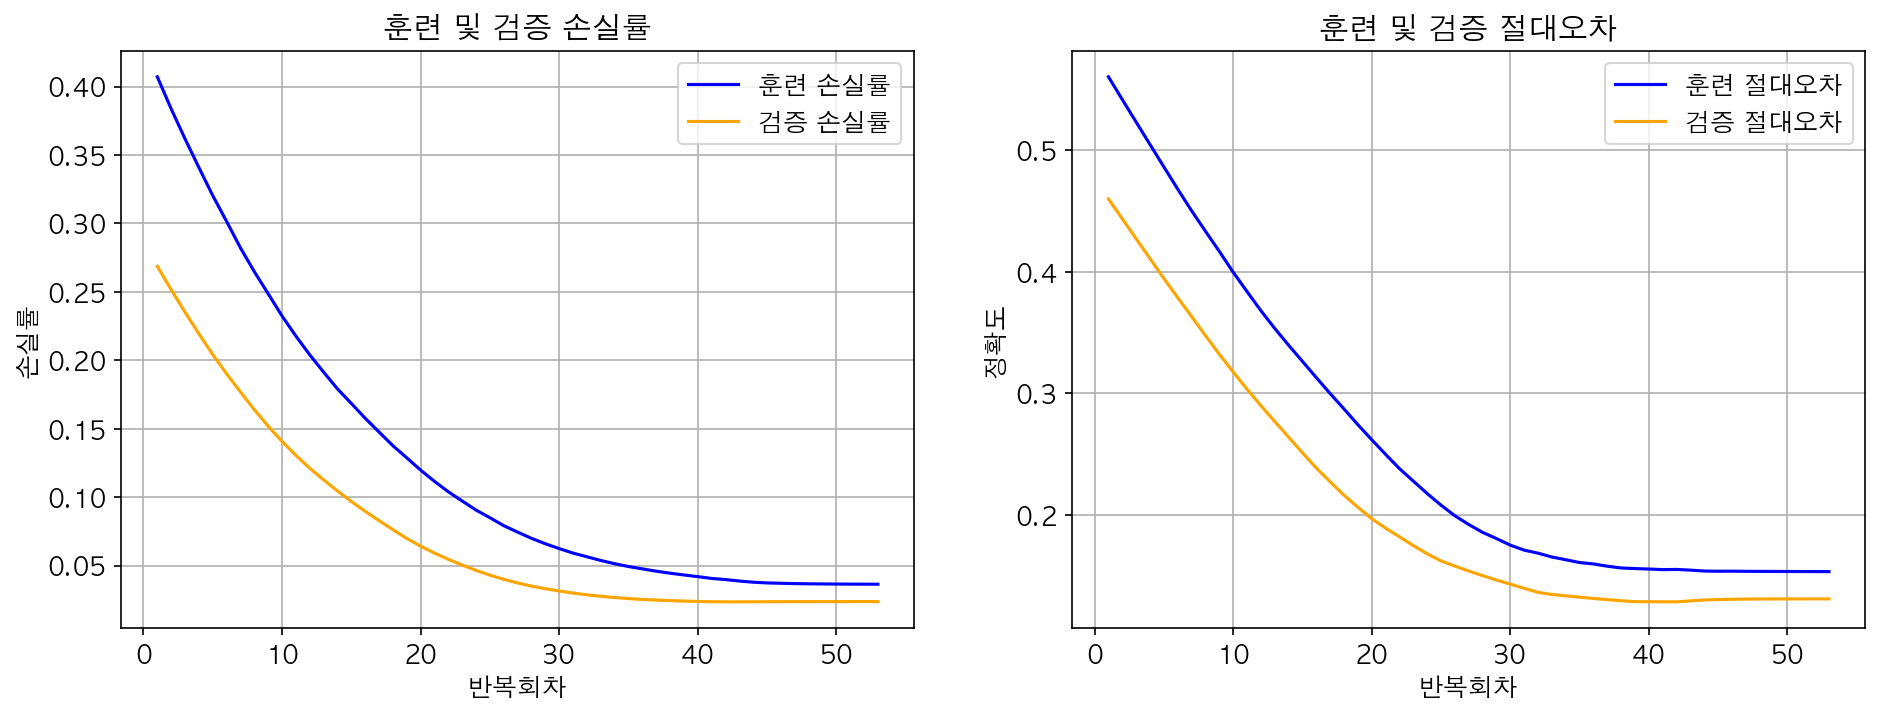

In [14]:
# 그래프 기본설정
plt.rcParams['font.family']='AppleGothic'
plt.rcParams['font.size']=12
plt.rcParams['axes.unicode_minus']=False

# 그래프를 그리기 위한 객체 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
sb.lineplot(x=result_df.index, 
            y='loss',
            data=result_df, 
            color='blue',
            label='훈련 손실률',
            ax=ax1)
sb.lineplot(x=result_df.index, 
            y='val_loss',
            data=result_df, 
            color='orange',
            label='검증 손실률',
            ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
sb.lineplot(x=result_df.index,
            y='mae',
            data=result_df,
            color='blue',
            label='훈련 절대오차',
            ax=ax2)
sb.lineplot(x=result_df.index,
            y='val_mae',
            data=result_df,
            color='orange',
            label='검증 절대오차',
            ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

> epochs를 500으로 지정했지만 `일찍 학습을 멈춘 것을 확인`할 수 있다
>
> 즉, 학습을 `조기 종료`함으로서 `학습 성능을 향상`시켰다고 할 수 있다

- 모델 성능 평가

In [15]:
evaluate1 = my_model.evaluate(x_train, y_train)
print('최종 훈련 손실률: %f, 최종 훈련 절대오차: %f' % (evaluate1[0], evaluate1[1]))

evaluate2 = my_model.evaluate(x_test, y_test)
print('최종 검증 손실률: %f, 최종 검증 절대오차: %f' % (evaluate1[0], evaluate2[1]))

2/2 [==============================] - 0s 5ms/step - loss: 0.0363 - mae: 0.1534
최종 훈련 손실률: 0.036322, 최종 훈련 절대오차: 0.153388
1/1 [==============================] - 0s 14ms/step - loss: 0.0237 - mae: 0.1310
최종 검증 손실률: 0.036322, 최종 검증 절대오차: 0.130996


### 8) 학습 결과 적용
- 테스트 데이터에 대한 예측 결과 산정

In [16]:
results = my_model.predict(x_test)
print(results)

1/1 [==============================] - 0s 48ms/step
[[0.4192801 ]
 [0.3467598 ]
 [0.33603132]
 [0.32278538]
 [0.39596617]
 [0.35748821]
 [0.35748821]
 [0.38842893]
 [0.33603132]
 [0.39596617]
 [0.35748821]
 [0.40245646]
 [0.26443684]
 [0.3467598 ]
 [0.20124234]]


- 결과 데이터셋 구성

In [17]:
kdf = DataFrame({'검증데이터': x_test.flatten(),
                 '실제값': y_test.flatten(),
                 '예측값': results.flatten()})

kdf['예측오차'] = kdf['실제값'] - kdf['예측값']

kdf

,검증데이터,실제값,예측값,예측오차
0,0.904762,0.440678,0.419280,0.021398
1,0.428571,0.271186,0.346760,-0.075573
2,0.380952,0.101695,0.336031,-0.234336
3,0.333333,0.127119,0.322785,-0.195667
4,0.714286,0.372881,0.395966,-0.023085
5,0.476190,0.491525,0.357488,0.134037
6,0.476190,0.661017,0.357488,0.303529
7,0.666667,0.338983,0.388429,-0.049446
8,0.380952,0.152542,0.336031,-0.183489
9,0.714286,0.559322,0.395966,0.163356


- 실제 결과값과 머신러닝에 의한 예측값 비교

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

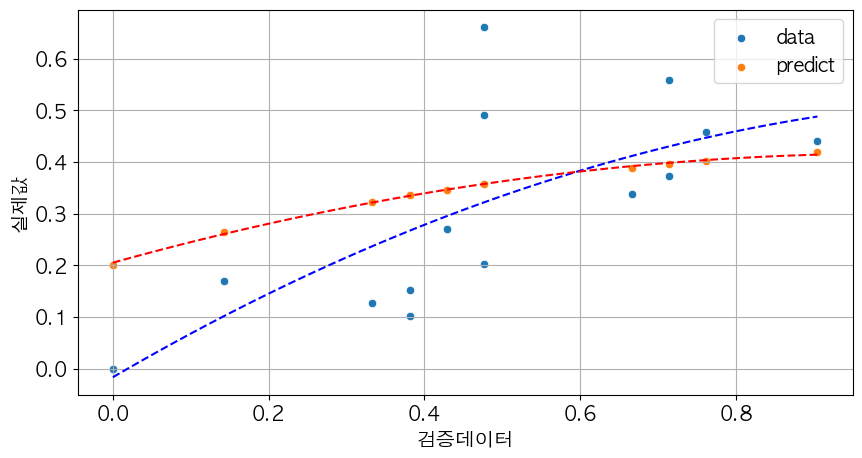

In [20]:
helper.regplot(x_left=kdf['검증데이터'],
               y_left=kdf['실제값'],
               y_left_pred=kdf['예측값'])

- 임의의 값에 대한 머신러닝 예측 결과

In [21]:
# 속도가 50일 때의 제동거리를 예측해보자
my_speed = 50

# 독립변수 표준화에 사용한 객체를 활용
my_speed_scale = x_scaler.transform([[my_speed]])
my_speed_scale

results = my_model.predict(my_speed_scale)
results

# 예측 결과는 표준화된 값으로 나오기 때문에 원래의 단위로 되돌리기 위해 역변환
y_scaler.inverse_transform(results)

1/1 [==============================] - 0s 14ms/step


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[68.78204]], dtype=float32)